<a href="https://colab.research.google.com/github/TankEngine1234/CPTS440/blob/main/Copy_of_CPTS_440_540_Practice_Problem_for_Exam_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**QUESTION 1**

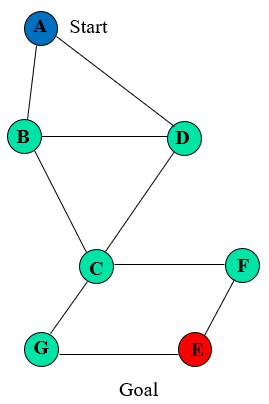

Consider the graph shown above whose (bidirectional) edges between two nodes indicate we can go from one node to the other in one hop (and vice versa).

Provide the search traces for depth-first search and breadth-first search and explicitly declare the solution path found by each algorithm.  

Assume both algorithms use the tie-breaking rule we described in class:

When multiple nodes are discovered by an exploration from the same node, they will enter the frontiers based on their alphabetical order.



Initialize
•	Frontier = [A]
•	Visited = {A}
•	parent(A)=None

Dequeue A, expand A
•	Neighbors of A: B,D.
•	Both are unvisited; enqueue them in alphabetical order → B then D.
•	Frontier = [B,D]
•	Visited = {A,B,D}
•	parent(B)=A, parent(B)=A

Dequeue B, expand B
•	Neighbors of B: A,C,D
•	A is visited, D is visited, C is unvisited → enqueue C.
•	Frontier = [D,C]
•	Visited = {A,B,C,D}
•	parent(C)=B,parent(C)=B

Dequeue D, expand D
•	Neighbors of D: A,C.
•	Both are already visited → no new enqueues.
•	Frontier = [C]

Dequeue C, expand C
•	Neighbors of C: B,D,F,G.
•	B,D are visited, F and G are unvisited → enqueue F, then G.
•	Frontier = [F,G]
•	Visited = {A,B,C,D,F,G}
•	parent(F)=C, Cparent(G)=C

BFS: Final Path
To find the path, we backtrack via parents from G:
•	parent(G)=C
•	parent(C)=B
•	parent(B)=

So, the BFS path from A to G is:
A  →  B  →  C  →  G


**Depth-First**
1.	Mark A visited. Neighbors (alphabetical): B,D.
o	First unvisited neighbor is BB. Recurse into BB.
DFS(B):
2.	Mark B visited. Neighbors (alphabetical): A,C,D.
o	A is visited; next unvisited is C. Recurse into C.
DFS(C):
3.	Mark C visited. Neighbors (alphabetical): B,D,F,G.
o	B is visited; next unvisited is D. Recurse into D.
DFS(D):
4.	Mark D visited. Neighbors (alphabetical): A,C — both visited, so backtrack to C.
5.	Returning to C, the next unvisited neighbor after D is F. Recurse into F.
DFS(F):DFS(F):
6.	Mark F visited. Neighbors: C,E.
o	C is visited; E is unvisited. Recurse into E.
DFS(E):
7.	Mark E visited. Neighbors: F,G.
o	F is visited; G is unvisited. Recurse into G.
DFS(G):
8.	Mark G visited. G is the goal → stop.
DFS: Final Path
The actual chain of recursive calls that leads to G (ignoring backtracks) is:
A  →  B  →  C  →  F  →  E  →  G
(We did visit DD briefly from C, but that path ended quickly and backtracked.)
So the DFS path from A to G is:
A  →  B  →  C  →  F  →  E  →  G



**QUESTION 2**

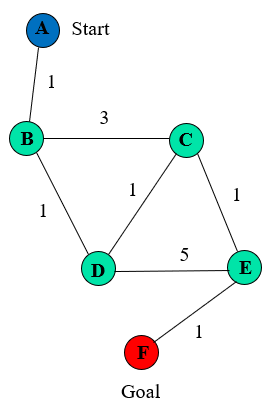

A. Provide the trace of best-first search (from A to E). Explicitly state the solution path found by best-first search.

B. Let us now attempt to instead find a path from A to C with the heuristic h(X) = |g(X) - g(C)| for any node X where g(X) denotes the shortest path from E to X found by the above best-first search algorithm. What is the solution path found by A* on this?

C. Is h admissible?

**SOLUTION**
1. Although the diagram labels F as “Goal,” here we focus on a greedy best‐first search from A to E. In a typical textbook example, one uses a heuristic h(n) that is the (estimated) straight‐line distance to E. The search proceeds as follows (sketch of expansions):
1.	Start at A. Frontier = {A}.
2.	Expand A. Neighbors: B.
o	Frontier = {B}.
3.	Expand BB. Neighbors: C,D.
o	Frontier = {C,D}.
o	Suppose h(C)<h(D) (i.e., C looks closer to E than D does).
4.	Expand C. Neighbors: B (visited), D, E.
o	Frontier = {D,E}.
o	Among these, E has the smallest heuristic value (since h(E)=).
5.	Expand E. E is the goal, so we stop.
From the parent pointers, the path reconstructed is
A  →  B  →  C  →  E.
Note. This path has cost 1+3+1=5. It is not the globally cheapest path to E (that would be A→B→D→C→E, cost 4), but greedy best‐first can miss cheaper paths because it always expands “the node that looks closest to the goal” next.


2. A∗ from A to C with h(X)=∣g(X)−g(C)| (where g(⋅) is cost from E) returns the path
A  →  B  →  D  →  C(cost 3)



3. Admissibility: The heuristic h(X)=
​	g(X)−g(C)
​
  does not overestimate the true cost from any node X to C, so it is admissible.






**QUESTION 3**

Consider the same graph in Question 2. Suppose we want to find a path from A to F with A* using the below heuristic:

| Node | $h$ |
|------|-----|
| A    | 4.50|
| B    | 3.00|
| C    | 1.50|
| D    | 2.75|
| E    | 1.00|
| F    | 0.00|

A. Is the heuristic admissible? Explain.

B. Is the heuristic consistent? Explain.

**SOLUTION**

A. A heuristic is admissible if, for every node
n, the heuristic value h(n) is no greater than the true (optimal) cost h ∗ (n) from n to the goal.

If these numbers were obtained from, say, a straight‐line (Euclidean) distance or any other method that never “overestimates” the actual cost, then we have for every node
h(n)≤ h ∗ (n)
Even if the heuristic is not “perfect” (it may be an underestimate at some nodes) it is still admissible. (Notice that
h(F)=0 exactly.)

Thus, if we assume that these numbers are indeed lower bounds on the true cost from each node to
F, then the heuristic is admissible.


B.
A heuristic is consistent (or monotonic) if for every edge (n,n′) the following inequality holds:

h(n)≤c(n,n′)+h(n′)

where c(n,n′) is the cost of the edge from n to n′. In other words, the “estimated distance” should decrease by no more than the actual cost of taking a step.

Let’s look at one likely problematic case. Suppose there is an edge from A to C. Then the consistency requirement for that edge is:

h(A)≤c(A,C)+h(C).

Plug in the numbers:

4.50≤c(A,C)+1.50.

This means that in order for the inequality to hold we must have
c(A,C)≥3.00.

If the actual cost from A to C is less than 3 (which is common in many such graphs), then the inequality would be violated and the heuristic would not be consistent.

Thus, while the heuristic never overestimates the true cost (and so is admissible), it may “drop” too fast along some edge(s) (as in the A→C case) so that the triangle inequality does not hold.

Therefore, unless every edge cost in the graph is such that, for example, the cost of going from A to C is at least 3, the heuristic is not consistent.



**QUESTION 4** Given two logic literals P and Q. Answer the following questions:

A. Is $(P \Rightarrow Q)$ equivalent to $(\neg Q \Rightarrow \neg P)$?

B. Is $\neg (P \land Q)$ equivalent to $(\neg P \lor \neg Q)$?

C. Is $\neg (P \lor Q)$ equivalent to $(\neg P \land \neg Q)$

For the above questions, if your answer is Yes, show that it is true for all cases. Otherwise, give a counter example.



**SOLUTION**

A. Yes.
•	Proof:
P⇒Q is equivalent to ¬P∨Q
¬Q⇒¬P is equivalent to Q∨¬P, which is the same as ¬P∨Q.
Thus, P⇒Q≡¬Q⇒¬P for all cases.

B. Yes.
•	Proof:
By De Morgan’s Law,¬(P∧Q)≡¬P∨¬Q.¬(P∧Q)≡¬P∨¬Q.

C. Yes.
•	Proof:
By De Morgan’s Law,¬(P∨Q)≡¬P∧¬Q.¬(P∨Q)≡¬P∧¬Q.


**QUESTION 5**

Consider the puzzle with the below English statements about three children Alice, Bill and Carl:

(1) One child has to be the youngest

(2) Alice and Bill cannot be both youngest

(3) Alice and Carl cannot be both youngest

(4) Bill and Carl cannot be both youngest

(5) Alice is youngest if Bill is not youngest

(6) Alice is not youngest if Carl is not youngest

--

**(I).** Let A denote the proposition that "Alice is the youngest child", B denote the proposition that "Bill is the youngest child", and C denote the proposition that "Carl is the youngest child".

Express the above 6 English statements in terms of propositional logic statement involving A, B and C.

**You are NOT allowed to introduce any new logic literals.**

**(II).** Prove that Bill is the youngest, i.e., showing that the logic knowledge-base (KB) in part **(I)** entails B



**SOLUTION**



(I) The English statements become:
1.	A∨B∨C
2.	¬(A∧B)
3.	¬(A∧C)
4.	¬(B∧C)
5.	¬B→A
6.	¬C→¬A

Part (II): Proving That Bill is the Youngest (i.e. KB ⊨ B)
We prove by contradiction.
1.	Assume the negation of B:
Assume ¬B
2.	From (5):
Since ¬B holds, by ¬B→A we deduce:
A(Alice is the youngest)
3.	Using (6):
Statement (6) is ¬C→¬A. Its contrapositive is:
A→C
Since A is true, we deduce:
C(Carl is the youngest)
4.	Contradiction with (3):
We now have both A and C true. However, statement (3) says:
¬(A∧C)
which is a contradiction.
5.	Conclusion:
Since assuming ¬B leads to a contradiction, we must have:
B(Bill is the youngest)


**QUESTION 6**

Consider the following linear minimization task:

$\mathrm{maximize}\ \ c_1x_1 + c_2x_2 + c_3x_3$

subject to

$5x_1 + x_2 \geq 1$

$x_1 + 4x_2 \leq 3$

$x_1 \geq 0$

$x_2 \geq 0$

$x_3 \geq 0$

where $c_1, c_2, c_3$ are scalar constants while $x_1, x_2, x_3$ are variables to be optimized.

Answer the following question:

A. Write out the generic form of the above task (see slides 39, lecture 8). [5pts]

B. Write out the standard form of the above task. Introduce the slack variables as necessary (see slides 57, lecture 8). [5pts]

**SOLUTION**



Part A.
Generic Form
We can state the problem in its generic “model” form as follows:

Maximize:

c1x1+c2x2+c3x3

Subject to:

5x1+x2≥1,

x1+4x2≤3,x1,

 x2, x3≥0.

In words, we are maximizing the linear function c1x1+c2x2+c3x3  subject to two linear constraints (one “≥” and one “≤”) and the nonnegativity restrictions on the decision variables.

Part B. Standard Form
1.	For the constraint 5x1+x2≥1:
Since the inequality is “≥”, we subtract a surplus variable s1≥0:
5x1+x2−s1=1
2.	For the constraint x1+4x2≤3:
Since the inequality is “≤”, we add a slack variable s2≥0:
x1+4x2+s2=3.
Thus, the LP in standard form becomes:

Maximize:

c1x1+c2x2+c3x3

Subject to:

5x1+x2−s1=1,

x1+4x2+s2=3,

x1, x2, x3, s1, s2≥0.

This is an acceptable standard form representation of the given LP.


**QUESTION 7**

Consider the following optimization task:

$\mathrm{minimize} \ \ \sum_{i=1}^m |\mathbf{a}_i^\top\mathbf{x} - b_i|$

where $\mathbf{a}_1, \mathbf{a}_2, \ldots, \mathbf{a}_m$ are $d$-dimensional column vectors of constants while $\mathbf{x}$ is a $d$-dimension column vector of variables, which needs to be optimized.

Apparently, the above is not yet in a form where we can apply linear optimization: The cost function involves the absolute operator which is not linear.

Can we transform this into linear form so that it can be solved by linear programming?

**SOLUTION**



**LP Reformulation:**

$\mathrm{minimize} \ \ \sum_{i=1}^m |\mathbf{a}_i^\top\mathbf{x} - b_i|$

where $\mathbf{a}_1, \mathbf{a}_2, \ldots, \mathbf{a}_m$ are $d$-dimensional column vectors of constants while $\mathbf{x}$ is a $d$-dimensional column vector of variables to be optimized.

To reformulate this as a linear program, introduce auxiliary variables $u_i \ge 0$ (for $i=1,\ldots,m$) satisfying:\ \ \sum_{i=1}^m |\mathbf{a}_i^\top\mathbf{x} - b_i|$

The equivalent linear program is:
\[
\begin{array}{rl}
\text{minimize}   & \displaystyle \sum_{i=1}^m u_i, \\[1mm]
\text{subject to} & a_i^\top x - b_i \leq u_i, \quad i=1,\ldots, m, \\[1mm]
                  & -(a_i^\top x - b_i) \leq u_i, \quad i=1,\ldots, m, \\[1mm]
                  & u_i \geq 0, \quad i=1,\ldots, m, \\[1mm]
                  & x \in \mathbb{R}^d.
\end{array}
\]
